<a href="https://colab.research.google.com/github/tjk168/IS-465-/blob/master/3_2_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print('hello world')

hello world


This is the start

In [0]:


# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause


import some packages: time is python time 

web mining is mining the text
web mining is fun
I like this class
idf log3/2
tf-idf 1/6*log3/2


In [0]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

define some variables 

In [0]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
print(n_samples)

2000


Define function

In [0]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

In [0]:
print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

Loading dataset...
done in 1.480s.


# Use tf-idf features for NMF.

In [0]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
done in 0.391s.


# Use tf (raw term count) features for LDA.

In [0]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

Extracting tf features for LDA...
done in 0.393s.



# Fit the NMF model

In [0]:
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.387s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp mail cc pub article information hope program mac email home contact blood
Topic #6: file problem files format win sound ftp pub read save sit

# Fit the NMF model

In [0]:
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)



Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 1.512s.

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: people don just like think did say time make know really right said things way ve course didn question probably
Topic #1: windows help thanks using hi looking info video dos pc does anybody ftp appreciated mail know advance available use card
Topic #2: god does jesus true book christian bible christians religion faith believe life church christ says know read exist lord people
Topic #3: thanks know bike interested mail like new car edu heard just price list email hear want cars thing sounds reply
Topic #4: 10 00 sale time power 12 new 15 year 30 offer condition 14 16 model 11 monitor 100 old 25
Topic #5: space government number public data states earth security water research nasa general 1993 phone information science technology provide blood internet
Topic #6: edu file com 

LDA Models

In [0]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 4.273s.

Topics in LDA model:
Topic #0: edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1: don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2: christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3: drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4: hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5: god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6: 55 10 11 18 15 team game 19 period play 23 12 13 flyers 20 25 22 17 24 16
Topic #7: car year just cars new engine like bike good oil i

Homework 2- Analyze the documents you classified

In [0]:
wordlist = data_samples[0].split()
BigString = ''.join(BigString)
print(BigString)
wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))
str(list(zip(wordlist, wordfreq)))

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.







Yeah, do you expect people to read the FAQ, etc. and actually accept hard
atheism?  No, you need a little leap of faith, Jimmy.  Your logic r

'[(\'Well\', 1), ("i\'m", 1), (\'not\', 3), (\'sure\', 1), (\'about\', 1), (\'the\', 14), (\'story\', 1), (\'nad\', 1), (\'it\', 1), (\'did\', 1), (\'seem\', 2), (\'biased.\', 1), (\'What\', 2), (\'I\', 3), (\'disagree\', 1), (\'with\', 1), (\'is\', 8), (\'your\', 1), (\'statement\', 1), (\'that\', 4), (\'the\', 14), (\'U.S.\', 4), (\'Media\', 1), (\'is\', 8), (\'out\', 1), (\'to\', 4), (\'ruin\', 1), (\'Israels\', 2), (\'reputation.\', 1), (\'That\', 1), (\'is\', 8), (\'rediculous.\', 1), (\'The\', 3), (\'U.S.\', 4), (\'media\', 3), (\'is\', 8), (\'the\', 14), (\'most\', 1), (\'pro-israeli\', 1), (\'media\', 3), (\'in\', 4), (\'the\', 14), (\'world.\', 1), (\'Having\', 1), (\'lived\', 1), (\'in\', 4), (\'Europe\', 1), (\'I\', 3), (\'realize\', 1), (\'that\', 4), (\'incidences\', 1), (\'such\', 1), (\'as\', 2), (\'the\', 14), (\'one\', 1), (\'described\', 1), (\'in\', 4), (\'the\', 14), (\'letter\', 1), (\'have\', 1), (\'occured.\', 1), (\'The\', 3), (\'U.S.\', 4), (\'media\', 3), (\'a

Visualization for Homework

In [0]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

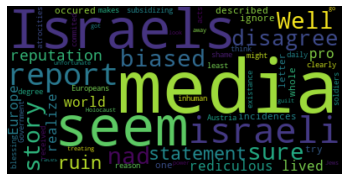

In [0]:
# Start with one review
text = data_samples[0]

# create a dn generate a word cloud
wordcloud = WordCloud().generate(text)

#display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()